In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error

In [ ]:
df_train= pd.read_csv('/content/PM_train.csv')
df_test= pd.read_csv('/content/PM_test.csv')
df_truth= pd.read_csv('/content/PM_truth.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [ ]:
for i in range(1, 101):
    max_rul = df_train[df_train['id'] == i]['cycle'].max()
    df_train.loc[df_train['id'] == i, 'RUL'] = df_train[df_train['id'] == i]['cycle'].apply(lambda x: max_rul - x)

In [ ]:
def standardize_data(df, columns_exclude):
    columns_to_standardize = df.columns.difference(columns_exclude)
    df_to_standardize = df[columns_to_standardize]
    df_excluded = df[columns_exclude]

    scaler = StandardScaler()
    df_standardized = pd.DataFrame(scaler.fit_transform(df_to_standardize), columns=columns_to_standardize)

    standardized_df = pd.concat([df_excluded.reset_index(drop=True), df_standardized], axis=1)

    return standardized_df


columns_exclude = ['id', 'cycle', 'RUL']


df_train_standardized = standardize_data(df_train, columns_exclude)

df_train_standardized.head()


,id,cycle,RUL,s1,s10,s11,s12,s13,s14,s15,...,s3,s4,s5,s6,s7,s8,s9,setting1,setting2,setting3
0,1,1,191.0,0.0,0.0,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,...,-0.134255,-0.925936,-1.776357e-15,0.141683,1.121141,-0.516338,-0.862813,-0.315980,-1.372953,0.0
1,1,2,190.0,0.0,0.0,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,...,0.211528,-0.643726,-1.776357e-15,0.141683,0.431930,-0.798093,-0.958818,0.872722,-1.031720,0.0
2,1,3,189.0,0.0,0.0,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,...,-0.413166,-0.525953,-1.776357e-15,0.141683,1.008155,-0.234584,-0.557139,-1.961874,1.015677,0.0
3,1,4,188.0,0.0,0.0,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,...,-1.261314,-0.784831,-1.776357e-15,0.141683,1.222827,0.188048,-0.713826,0.324090,-0.008022,0.0
4,1,5,187.0,0.0,0.0,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,...,-1.251528,-0.301518,-1.776357e-15,0.141683,0.714393,-0.516338,-0.457059,-0.864611,-0.690488,0.0


In [ ]:
df_train_standardized = standardize_data(df_train, columns_exclude)
df_test = pd.merge(df_test, df_truth.rename(columns={'cycle': 'RUL'}), on=['id'], how='left')
df_test['RUL'] = df_test['RUL'] - df_test['cycle']

df_test = standardize_data(df_test, columns_exclude)

X = df_test.drop(columns=['id', 'cycle', 'RUL'])
y = df_test['RUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
X = df_test.drop(columns=['id', 'RUL'])
y = df_test['RUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_test.head()

,id,cycle,RUL,s1,s10,s11,s12,s13,s14,s15,...,s3,s4,s5,s6,s7,s8,s9,setting1,setting2,setting3
0,1,1,111,0.0,-2.220446e-16,-1.103591,-0.049542,-0.720590,-1.315031,-0.711659,...,-0.561495,-0.975674,-1.776357e-15,0.17566,0.209138,-0.539078,-0.720312,1.049295,1.005927,0.0
1,1,2,110,0.0,-2.220446e-16,0.427727,0.736727,-0.193647,0.065977,-1.570037,...,0.070116,-1.392836,-1.776357e-15,0.17566,1.603612,-1.061366,-0.348673,-1.220748,-1.034755,0.0
2,1,3,109,0.0,-2.220446e-16,0.427727,0.397202,-0.720590,-0.868436,0.629340,...,-0.231698,-0.507676,-1.776357e-15,0.17566,0.517390,-0.364982,-0.126564,0.141278,0.325700,0.0
3,1,4,108,0.0,-2.220446e-16,-0.695239,-0.657113,-0.369295,-0.593609,-1.177045,...,-0.795350,0.251888,-1.776357e-15,0.17566,0.458675,-0.713174,-1.147041,1.911912,-0.014414,0.0
4,1,5,107,0.0,-2.220446e-16,-0.542108,0.718857,-0.720590,-0.923402,-0.784053,...,-0.181729,-0.420954,-1.776357e-15,0.17566,0.590783,-1.061366,-1.211750,0.640688,-0.014414,0.0


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = gb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1400.7917546026774
R^2 Score: 0.7519428774485297
Mean Absolute Error: 32.00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

models = {
    'Gradient Boosting':GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42, n_estimators=100),
    'Extra Trees': ExtraTreesRegressor(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name}:')
    print(f'  Mean Squared Error: {mse:.2f}')
    print(f'  R^2 Score: {r2:.2f}')
    print(f'  Mean Absolute Error: {mae:.2f}')

Gradient Boosting:
  Mean Squared Error: 1400.79
  R^2 Score: 0.75
  Mean Absolute Error: 32.00
AdaBoost:
  Mean Squared Error: 1583.88
  R^2 Score: 0.72
  Mean Absolute Error: 35.08
Extra Trees:
  Mean Squared Error: 1364.55
  R^2 Score: 0.76
  Mean Absolute Error: 30.82
Decision Tree:
  Mean Squared Error: 1559.19
  R^2 Score: 0.72
  Mean Absolute Error: 33.49
XGBoost:
  Mean Squared Error: 1519.47
  R^2 Score: 0.73
  Mean Absolute Error: 31.81
Random Forest:
  Mean Squared Error: 1375.09
  R^2 Score: 0.76
  Mean Absolute Error: 30.79


In [ ]:
import matplotlib.pyplot as plt


y_test_50 = y_test[:50]
y_pred_50 = y_pred[:50]

plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test_50, label='Actual', color='blue', alpha=0.6)
plt.scatter(range(50), y_pred_50, label='Predicted', color='red', alpha=0.6, marker='x')
plt.title('Actual vs Predicted - First 50 Values')
plt.xlabel('Samples')
plt.ylabel('RUL (Remaining Useful Life)')
plt.legend()
plt.show()


In [ ]:
errors = y_pred - y_test
overestimated = errors[errors > 0]
underpredicted = errors[errors <= 0]
print(f"Mean Overestimation: {overestimated.mean()}")
print(f"Mean Underestimation: {underpredicted.mean()}")
print(f"Overall Mean Error: {errors.mean()}")


Mean Overestimation: 31.445022900763355
Mean Underestimation: -30.132335877862594
Overall Mean Error: 0.6563435114503815


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    random_state=42,
)


random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)

best_xgb_model = random_search.best_estimator_

y_pred_tuned = best_xgb_model.predict(X_test_scaled)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
print(f'Best XGBoost Model - Mean Squared Error: {mse_tuned:.2f}')
print(f'Best XGBoost Model - Mean Absolute Error: {mae_tuned:.2f}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best XGBoost Model - Mean Squared Error: 1435.38
Best XGBoost Model - Mean Absolute Error: 30.94


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


rf_model = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
   'max_features': ['sqrt', 'log2'] ,
    'bootstrap': [True, False]
}


random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=80,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    random_state=42
)


random_search_rf.fit(X_train_scaled, y_train)
print("Best Parameters:", random_search_rf.best_params_)
best_rf_model = random_search_rf.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
print(f'Best Random Forest Model - Mean Squared Error: {mse_tuned_rf:.2f}')
print(f'Best Random Forest Model - Mean Absolute Error: {mae_tuned_rf:.2f}')


Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Random Forest Model - Mean Squared Error: 1430.34
Best Random Forest Model - Mean Absolute Error: 31.68


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


et_model = ExtraTreesRegressor(random_state=42)


param_dist_et = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search_et = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_dist_et,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search_et.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search_et.best_params_)

best_et_model = random_search_et.best_estimator_

y_pred_tuned_et = best_et_model.predict(X_test_scaled)
mse_tuned_et = mean_squared_error(y_test, y_pred_tuned_et)
mae_tuned_et = mean_absolute_error(y_test, y_pred_tuned_et)
print(f'Best Extra Trees Model - Mean Squared Error: {mse_tuned_et:.2f}')
print(f'Best Extra Trees Model - Mean Absolute Error: {mae_tuned_et:.2f}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Extra Trees Model - Mean Squared Error: 1441.94
Best Extra Trees Model - Mean Absolute Error: 32.27


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

def predictions(y_true, y_pred):
    pred = np.minimum(y_pred, y_true)
    return pred


pred_y = predictions(y_test, y_pred)

mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)


def penalized_loss(y_true, y_pred):
    penalty = np.where(y_pred > y_true, (y_pred - y_true) ** 2, 0)
    mse = mean_squared_error(y_true, y_pred)
    penalized_mse = mse + np.mean(penalty)
    return penalized_mse



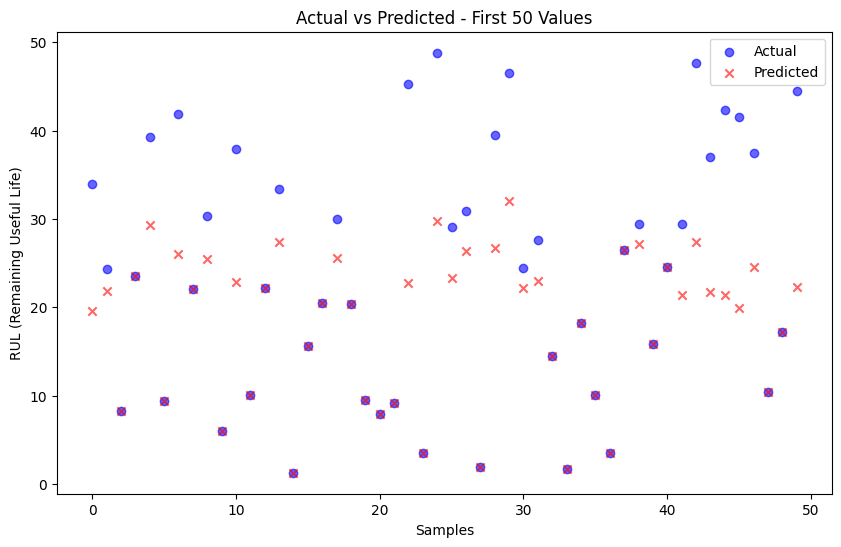

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pred_y = np.minimum(y_pred[:50], y_test[:50])
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], label='Actual', color='blue', alpha=0.6)
plt.scatter(range(50), pred_y, label='Predicted', color='red', alpha=0.6, marker='x')
plt.title('Actual vs Predicted -50 Values')
plt.xlabel('Samples')
plt.ylabel('RUL (Remaining Useful Life)')
plt.legend()
plt.show()
